In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#load data
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


For each question, make sure to:

    State your Null Hypothesis and Alternative Hypothesis
    Select the correct test according to the data type and number of samples
    Test the assumptions of your selected test.
    Execute the selected test, or the alternative test (if you do not meet the assumptions)
    Interpret your p-value and reject or fail to reject your null hypothesis 
    Show a supporting visualization that helps display the result

## Do smokers have higher insurance charges than non-smokers?

### State your Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): Insurance charges are the same for both smokers and non-smokers
- $H_A$ (Alternative Hypothesis): Smokers have significantly higher insurance charges than non-smokers.

### Select the correct test according to the data type and number of samples

>Insurance charges is a numerical column and we have 2 samples, smokers and non-smokers, to compare. Therefore, we will be using a 2 Samples T-Test.

### Test the assumptions of your selected test

The 2-sample T-Test has the following assumptions:
 - No significant outliers
 - Normality
 - Equal Variance

In [3]:
#seperate out the colujmns we are interested in
smoker_df = df.loc[df['smoker']=='yes', ['charges','smoker']]
non_smoker_df = df.loc[df['smoker']=='no', ['charges','smoker']]
non_smoker_df.head()

,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no


In [4]:
#concat the above dataframes for initial visualization
plot_df = pd.concat([smoker_df, non_smoker_df], axis=0)
plot_df

,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes
...,...,...
1332,11411.6850,no
1333,10600.5483,no
1334,2205.9808,no
1335,1629.8335,no


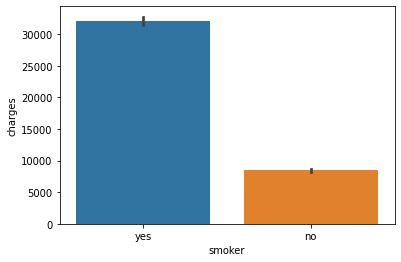

In [5]:
#initial visualization for comparison later
ax = sns.barplot(data=plot_df, x='smoker', y='charges', ci=68)

>The initial visualization indicates that smokers receive much larger charges than non-smokers.

In [6]:
#save the dataframes into panda series groups to make testing workflow easier
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
display(smoker_group.head(), non_smoker_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

#### Checking for Outliers

In [7]:
## Check for absolute value of z-scores that are > 3
is_outlier_smoker = np.abs(stats.zscore(smoker_group)) > 3
print(f"There are {is_outlier_smoker.sum()} outliers in the smoker group out of {len(smoker_group)})")

There are 0 outliers in the smoker group out of 274)


In [8]:
#perform the same check on the non-smokers group
is_outlier_non_smoker = np.abs(stats.zscore(non_smoker_group)) > 3
print(f"There are {is_outlier_non_smoker.sum()} outliers in the non-smoker group out of {len(non_smoker_group)})")

There are 24 outliers in the non-smoker group out of 1064)


In [9]:
#remove non-smoker outliers
non_smoker_group = non_smoker_group.loc[~is_outlier_non_smoker]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Check for Normality


>Both groups are n > 15, so we can ignore the assumption of normality

#### Checking for Equal Variance

In [10]:
result = stats.levene(smoker_group, non_smoker_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


> For the Levene test, the null hypothesis is that both groups have equal variance. With a p value less than .05, we reject the null and conclude that the two groups do not have equal variance.

>As such, we will be running our test with equal_var=False

### Statistical Test


In [11]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

### Conclusion

>The result of our test returned a p-value much, much less than .05. We reject the null hypothesis that there is not difference in charges between smokers and non-smokers. The visualization below will show the difference between the mean of our two final groups.

In [12]:
plot_df = pd.concat([smoker_df.loc[~is_outlier_smoker], 
                     non_smoker_df.loc[~is_outlier_non_smoker]], axis=0)
plot_df

,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes
...,...,...
1332,11411.6850,no
1333,10600.5483,no
1334,2205.9808,no
1335,1629.8335,no


<AxesSubplot:xlabel='smoker', ylabel='charges'>

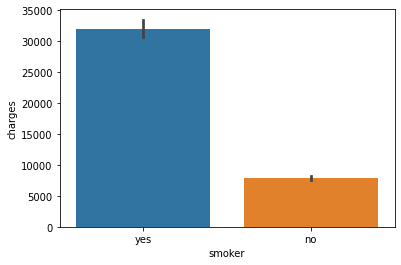

In [13]:
sns.barplot(data=plot_df, x='smoker',y='charges')

##  Are men more likely to smoke than women?

### State your Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): Both women and men are equally likely to smoke
- $H_A$ (Alternative Hypothesis): Men are significantly more likely to smoke than women are.

### Select the correct test according to the data type and number of samples

>As the metric is a binary category, smoker or non-smoker, and we have two groups, women and men, we will be using the Chi-Square test.

### Test the assumptions of your selected test

The Chi-Squared test has two assumptions
 - There are two categorical variables (ordinal or nominal)
 - The outcomes are independent


In [14]:
#check value_counts of sex and smoker columns to confirm there are only two categories per column
print(df['sex'].value_counts())
print(df['smoker'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


>Neither category is dependent on the other, so we satisfy the second assumption of the Chi-Squared test.

### Statistical Test

<AxesSubplot:xlabel='sex', ylabel='count'>

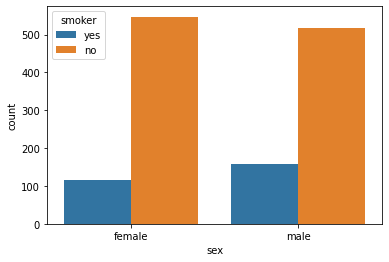

In [15]:
#visualization of smokers/non-smokers by sex
sns.countplot(data=df, x='sex',hue='smoker',)


In [16]:
#generate contingancy test
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [17]:
#run chi-squared test
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [18]:
#display p value
print(p)
p<.05

0.006548143503580696


True

### Conclusion

>The p value is less than the alpha threshold of 0.05, so we reject the null hypothesis. We conclude that the alternative hypothesis is correct and men are more likely than women to be smokers.

## Do different regions have different charges, on average?

to do
 - formulate hypothesis
 - prep data for ANOVA/Tukey test(s)
 - test assumptions for ANOVA/Tukey test(s), as target is numrical and there are more than two regions

### State your Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): There is no difference in mean charges between regions.
- $H_A$ (Alternative Hypothesis): There is a significant difference in mean charges between regions.

### Select correct test according to data type and number of samples

>The metric, mean value of charges, is numerical while we have 4 different categories to measure in our test. We will be using the ANOVA and/or Tukey test.

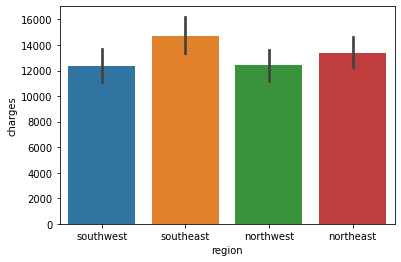

In [19]:
#visualization of charges by region
sns.barplot(data=df, x='region',y='charges');

>Currently, the mean charges value for each region show a larger amount in the southeast, less larger amount in the northeast, and similar charges in the southwest and northwest. The error bars are a little long, so lets see how the results are after our test.

### Test the assumptions of your selected test

The 2-sample T-Test has the following assumptions:
 - No significant outliers
 - Normality
 - Equal Variance

#### Checking for Outliers

In [20]:
#setup up each region into it's own group
southwest = df.loc[df['region']=='southwest']
southeast = df.loc[df['region']=='southeast']
northeast = df.loc[df['region']=='northeast']
northwest = df.loc[df['region']=='northwest']
#sanity check
southwest

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92400
12,23,male,34.4,0,no,southwest,1826.84300
15,19,male,24.6,1,no,southwest,1837.23700
18,56,male,40.3,0,no,southwest,10602.38500
19,30,male,35.3,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...
1316,19,female,20.6,0,no,southwest,1731.67700
1329,52,male,38.6,2,no,southwest,10325.20600
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.68500


We will be using the same zscore method from the first test to detect and remove any outliers.

In [21]:
#outliers in southwest region
is_outlier_southwest = np.abs(stats.zscore(southwest['charges'])) > 3
print(f"There are {is_outlier_southwest.sum()} outliers in the charges of {len(southwest)}")

There are 8 outliers in the charges of 325


In [22]:
#remover outliers in southwest region
southwest = southwest.loc[~is_outlier_southwest]
southwest

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92400
12,23,male,34.4,0,no,southwest,1826.84300
15,19,male,24.6,1,no,southwest,1837.23700
18,56,male,40.3,0,no,southwest,10602.38500
19,30,male,35.3,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...
1316,19,female,20.6,0,no,southwest,1731.67700
1329,52,male,38.6,2,no,southwest,10325.20600
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.68500


In [23]:
#outliers in southeast region
is_outlier_southeast = np.abs(stats.zscore(southeast['charges'])) > 3
print(f"There are {is_outlier_southeast.sum()} outliers in the charges of {len(southeast)}")

There are 2 outliers in the charges of 364


In [24]:
#remover outliers in southeast region
southeast = southeast.loc[~is_outlier_southeast]
southeast

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
11,62,female,26.29,0,yes,southeast,27808.7251
...,...,...,...,...,...,...,...
1322,62,male,38.83,0,no,southeast,12981.3457
1323,42,female,40.37,2,yes,southeast,43896.3763
1327,51,male,30.03,1,no,southeast,9377.9047
1330,57,female,25.74,2,no,southeast,12629.1656


In [25]:
#outliers in northwest region
is_outlier_northwest = np.abs(stats.zscore(northwest['charges'])) > 3
print(f"There are {is_outlier_northwest.sum()} outliers in the charges of {len(northwest)}")

There are 7 outliers in the charges of 325


In [26]:
#remover outliers in northwest region
northwest = northwest.loc[~is_outlier_northwest]
northwest

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175
...,...,...,...,...,...,...,...
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1324,31,male,25.935,1,no,northwest,4239.89265
1333,50,male,30.970,3,no,northwest,10600.54830


In [27]:
#outliers in northeast region
is_outlier_northeast = np.abs(stats.zscore(northeast['charges'])) > 3
print(f"There are {is_outlier_northeast.sum()} outliers in the charges of {len(northeast)}")

There are 4 outliers in the charges of 324


In [28]:
northeast

,age,sex,bmi,children,smoker,region,charges
8,37,male,29.830,2,no,northeast,6406.41070
10,25,male,26.220,0,no,northeast,2721.32080
16,52,female,30.780,1,no,northeast,10797.33620
17,23,male,23.845,0,no,northeast,2395.17155
20,60,female,36.005,0,no,northeast,13228.84695
...,...,...,...,...,...,...,...
1321,62,male,26.695,0,yes,northeast,28101.33305
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1328,23,female,24.225,2,no,northeast,22395.74424


In [29]:
#concatinate the region dataframes into a new dataframe with no outliers
df_no_outliers = pd.concat([southwest, southeast, northwest, northeast], ignore_index=True)
df_no_outliers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,23,male,34.400,0,no,southwest,1826.84300
2,19,male,24.600,1,no,southwest,1837.23700
3,56,male,40.300,0,no,southwest,10602.38500
4,30,male,35.300,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...
1316,62,male,26.695,0,yes,northeast,28101.33305
1317,61,male,33.535,0,no,northeast,13143.33665
1318,42,female,32.870,0,no,northeast,7050.02130
1319,23,female,24.225,2,no,northeast,22395.74424


In [30]:
# Create regions dictionary.
regions = {}
# Loop through unique categories
for i in df_no_outliers['region'].unique():
    #series for regions and rename
    data = df_no_outliers.loc[df_no_outliers['region']==i,'charges'].copy()
    
    # save into the dictionary
    regions[i] = data
regions.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### Checking for Normality

In [35]:
#normalality test on each region and confirm n>20 in each group
norm_results = {}
for i, data in regions.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,324.0,1.455431e-19,86.747629,True


>All regions have a p value less than five. Our data is significantly different than a normal distribution.

#### Check for Equal Variance

In [36]:
#levene test for equal variance, using the * operator
stats.levene(*regions.values())

LeveneResult(statistic=8.921486538598426, pvalue=7.4716434113378135e-06)

>Our p value is less than .05, showing that are data meets the assumption of equal variance.

### Statistical Test

In [37]:
#oneway ANOVA test, using the * operator
result = stats.f_oneway( *regions.values())
result

F_onewayResult(statistic=5.675214457423963, pvalue=0.0007330041785043063)

>The ANOVA test p value is less than .05, rejecting the null hypothesis. However, it only tells us that we have a significant difference in the charges between regions, but not what those regions are. We will perform a Tukey's comparison test to find that information.

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#save charges as values and region as lables
values = df_no_outliers['charges']
labels = df_no_outliers['region']

In [42]:
#tukey's multiple comparison test and summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-1809.3828,0.1797,-4109.3527,490.5871,False
northeast,southeast,1061.3681,0.6109,-1166.9437,3289.68,False
northeast,southwest,-1980.3808,0.1202,-4282.1808,321.4192,False
northwest,southeast,2870.7509,0.0055,631.3734,5110.1284,True
northwest,southwest,-170.998,0.9976,-2483.512,2141.516,False
southeast,southwest,-3041.7489,0.0028,-5283.006,-800.4919,True


>Here, we can see that there are significant differences in charges between the following regions: northwest & southeast, southeast & southwest

### Conclusion

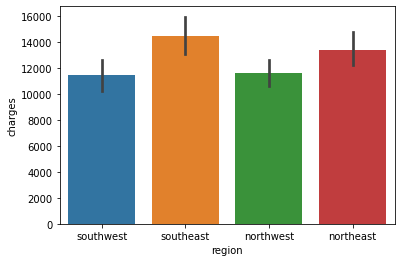

In [43]:
sns.barplot(data=df_no_outliers, x='region',y='charges');

>Our testing indicated that there are significantly different mean charges between the northwest & southeast, as well as southeast & southwest regions. The graph above illustrates these relationships well, with the southeast region showing the highest charges overall

>Please note that the northeast region also has high charges on the graph, but did not show any significant differences in the ANOVA test. This could be due to failing the Normality assumption. It is possible that the ANOVA test, as ran, was not setup to handle that issue.